# Synexpression groups identification - Euclidean

ID: 

Name: Iris Milligan

Last modified: 28.04.2021

## Required Libraries

In [1]:
import pandas as pd
import scipy
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex, colorConverter
from mpl_toolkits.mplot3d import Axes3D


In [4]:
# Open File to Process
rawdata = pd.read_table("TomoZF10ss.csv",delimiter = ',')

In [5]:
# Import external data
# convert data type

# Mapping ENSEMBL back to GENE name to help label and search operations 
gene_mapping = rawdata
gene_mapping.index = gene_mapping['ENSEMBL']
gene_mapping = gene_mapping[gene_mapping.columns[1:2]]
gene_mapping = gene_mapping.fillna(0)

# now loop through the mapping and convert any gene names = 0 to the ensemble
for row_num, value in enumerate(gene_mapping.index.values):
    if(gene_mapping.iloc[row_num][0]==0):
        gene_mapping.iloc[row_num,0] = value 
    
# set index
rawdata.index = rawdata['ENSEMBL'] 
rawdata = rawdata.drop(['ENSEMBL','gene','name'], axis=1)

# Have to drop Rows where the Gene name aka(index) is Blank
# data = data.loc[data.index.dropna(how='all')]
# To Follow Spactial DB we convert NaN to 0
rawdata = rawdata.fillna(0)

# need to capture row 0 into a list for mapping later as column names
section_map = rawdata.columns.tolist()

## Now cut the data into the different groups AP, LR and VD

In [6]:
# subset gene

data = rawdata[rawdata.columns[0:51]]
APdata = rawdata[rawdata.columns[0:52]]
LRdata = rawdata[rawdata.columns[52:104]]
VDdata = rawdata[rawdata.columns[104:156]]

# Rename Columns so they align for future plotting.
LRdata.columns=APdata.columns
VDdata.columns=APdata.columns

In [20]:
### Hieu's code
## Z-normalization
df_z_scaled = rawdata.copy()
df_z_scaled = df_z_scaled.T
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    

## Pairwise Euclidean distance 
df_z_scaled = df_z_scaled.T
pairwise = pd.DataFrame(
squareform(pdist(df_z_scaled)),
    columns = gene_mapping['gene'].to_list(),
    index = gene_mapping['gene'].to_list()
)
#Testing on ENSDARG00000052402
temp = pairwise[["fgf17"]]
temp = temp.sort_values(by='fgf17')
print(temp.head(n=20))

                    fgf17
fgf17            0.000000
hoxb9a           5.334228
hoxb7a           5.837748
myf5             5.889093
hspa12a          6.019771
six4a            6.082086
si:dkey-14o18.1  6.249306
hoxa9a           6.277963
COL5A2 (2 of 2)  6.312326
plk3             6.322751
par1             6.368664
phc2a            6.375161
meox1            6.440239
tjp2b            6.493064
enah             6.675577
ston2            6.734557
efemp2b          6.799174
hoxb10a          6.839623
dld              6.855087
ARID3C           6.864489


## Build Line Plots

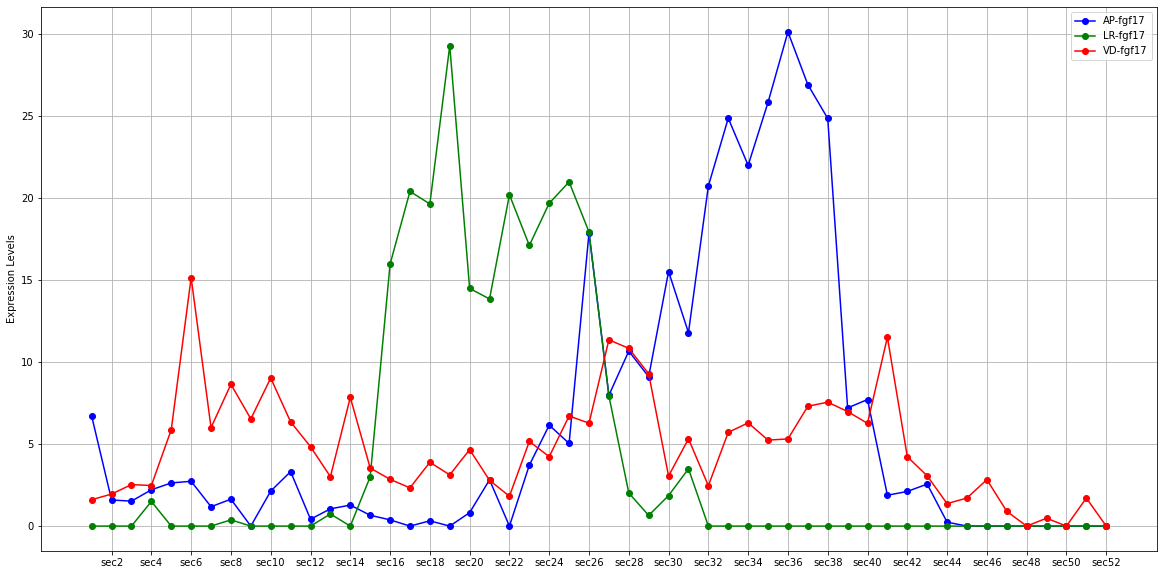

In [8]:
# Generate LinePlot to compare with SpatialDB
geneID = "fgf17"
ensemblID = gene_mapping.loc[gene_mapping['gene']==geneID]
# Need to build dataframe from AP, LR and VD dataframes to use for Multi-Line plot
lineDF = pd.DataFrame(columns=APdata.columns)
lr1 = pd.DataFrame(columns=APdata.columns)
vd1 = pd.DataFrame(columns=APdata.columns)
lensemb_value=ensemblID.index.values

# Find gene in each of the 3 DataFrames
lineDF=APdata.loc[lensemb_value,:]
lr1=LRdata.loc[lensemb_value,:]
vd1=VDdata.loc[lensemb_value,:]

# Now append results into 1 DataFrame
lineDF=lineDF.append(lr1,ignore_index=False)
lineDF=lineDF.append(vd1,ignore_index=False)

# Transpose ne DataFrame
lineDFT = lineDF.T

# Set Labels
lineDFT.columns=['AP-'+geneID,'LR-'+geneID,'VD-'+geneID]

# Set frequency of x tick marks
p=0
xticks_label = pd.DataFrame(columns=['label'])
for col_num, value in enumerate(lineDFT.index.values):
    if(col_num%2):
        xticks_label.loc[p] = [value]
        p=p+1
        
# Set Tick Labels        
label_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51]
markers=['o','d','s']
lineDFT.plot(figsize=(20,10),grid=True,xticks=label_list,color=["blue","green","red"],marker='o', ylabel="Expression Levels")
plt.show()

## Build line plots for the AP, LR and VD represemntations of the top genes for fgf17

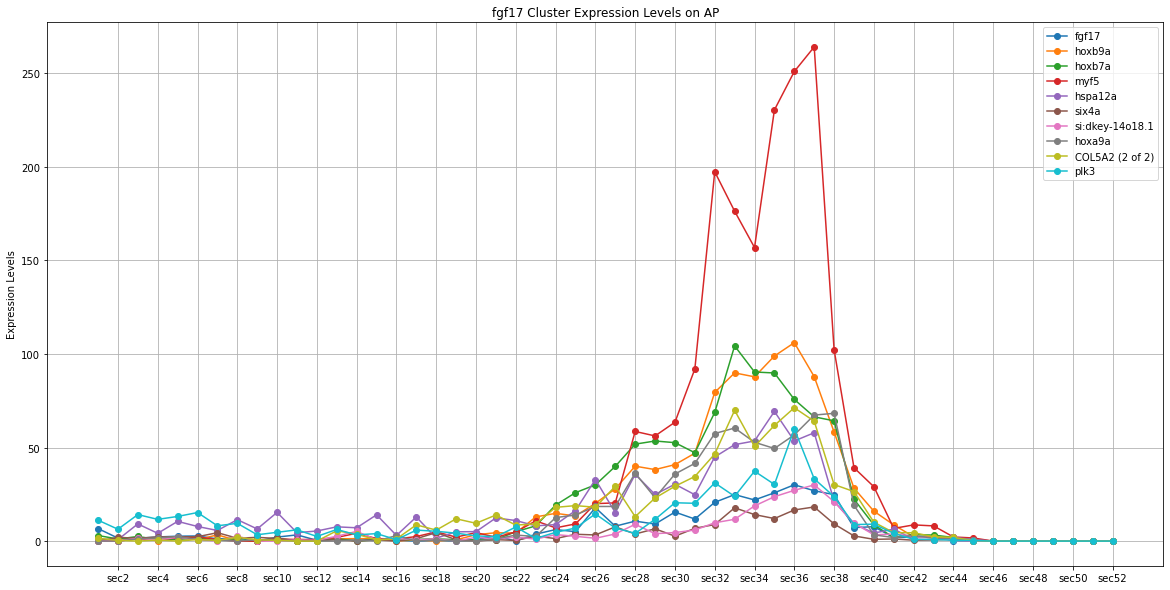

In [75]:
# Generate LinePlot to compare with SpatialDB
plotlist = temp.index.to_list()
plotgenes = plotlist[:10]

# Loop through list and build data for line plot
i = 0
APdata.index = gene_mapping['gene'].to_list()

APdataT = APdata.T
lineDF = pd.DataFrame(columns=APdata.columns)

while i < 10:
    geneID = plotgenes[i]
    lineDF = lineDF.append(APdata.loc[geneID],ignore_index=False)
    i = i+1    

# Transpose ne DataFrame
lineDFT = lineDF.T
# Set Labels
lineDFT.columns=plotgenes

# Set frequency of x tick marks
p=0
xticks_label = pd.DataFrame(columns=['label'])
for col_num, value in enumerate(lineDFT.index.values):
    if(col_num%2):
        xticks_label.loc[p] = [value]
        p=p+1
        
# Set Tick Labels        
label_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51]
lineDFT.plot(figsize=(20,10),grid=True,xticks=label_list, marker='o', ylabel="Expression Levels",title="fgf17 Cluster Expression Levels on AP")
plt.show()

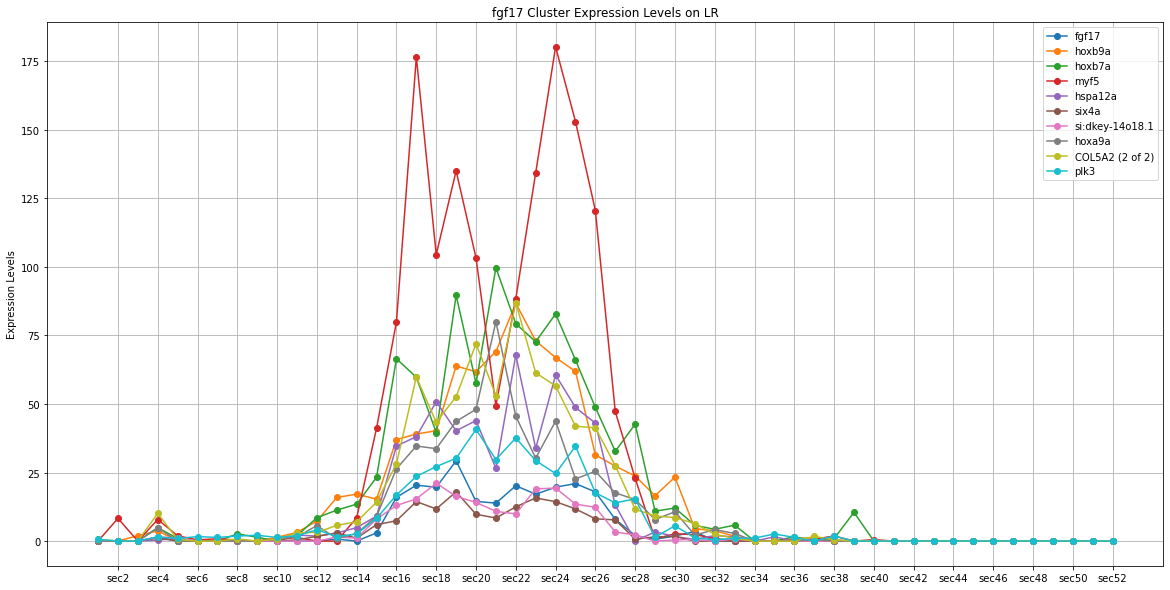

In [76]:
# Generate LinePlot to compare with SpatialDB
plotlist = temp.index.to_list()
plotgenes = plotlist[:10]

# Loop through list and build data for line plot
i = 0
LRdata.index = gene_mapping['gene'].to_list()

LRdataT = LRdata.T
lineDF = pd.DataFrame(columns=LRdata.columns)

while i < 10:
    geneID = plotgenes[i]
    lineDF = lineDF.append(LRdata.loc[geneID],ignore_index=False)
    i = i+1    

# Transpose ne DataFrame
lineDFT = lineDF.T
# Set Labels
lineDFT.columns=plotgenes

# Set frequency of x tick marks
p=0
xticks_label = pd.DataFrame(columns=['label'])
for col_num, value in enumerate(lineDFT.index.values):
    if(col_num%2):
        xticks_label.loc[p] = [value]
        p=p+1
        
# Set Tick Labels        
label_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51]
lineDFT.plot(figsize=(20,10),grid=True,xticks=label_list, marker='o', ylabel="Expression Levels",title="fgf17 Cluster Expression Levels on LR")
plt.show()

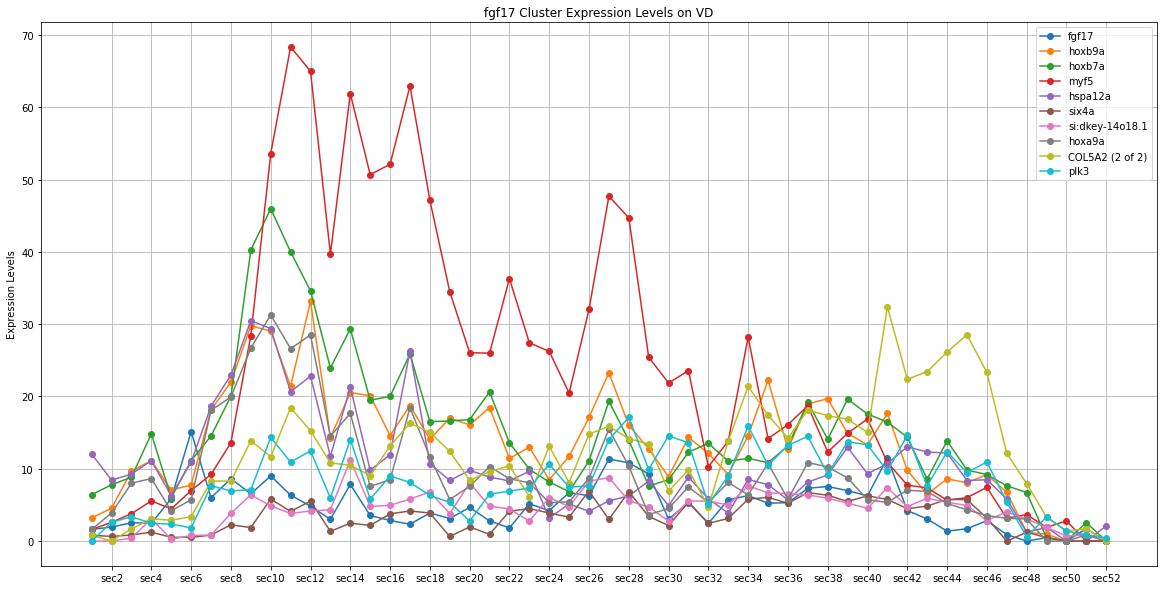

In [77]:
# Generate LinePlot to compare with SpatialDB
plotlist = temp.index.to_list()
plotgenes = plotlist[:10]

# Loop through list and build data for line plot
i = 0
VDdata.index = gene_mapping['gene'].to_list()

VDdataT = VDdata.T
lineDF = pd.DataFrame(columns=VDdata.columns)

while i < 10:
    geneID = plotgenes[i]
    lineDF = lineDF.append(VDdata.loc[geneID],ignore_index=False)
    i = i+1    

# Transpose ne DataFrame
lineDFT = lineDF.T
# Set Labels
lineDFT.columns=plotgenes

# Set frequency of x tick marks
p=0
xticks_label = pd.DataFrame(columns=['label'])
for col_num, value in enumerate(lineDFT.index.values):
    if(col_num%2):
        xticks_label.loc[p] = [value]
        p=p+1
        
# Set Tick Labels        
label_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51]
lineDFT.plot(figsize=(20,10),grid=True,xticks=label_list, marker='o', ylabel="Expression Levels",title="fgf17 Cluster Expression Levels on VD")
plt.show()